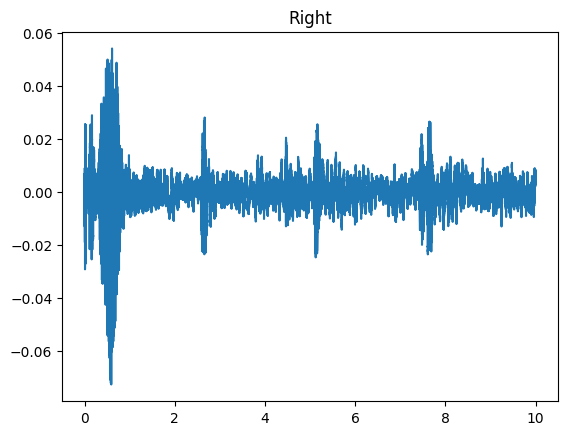

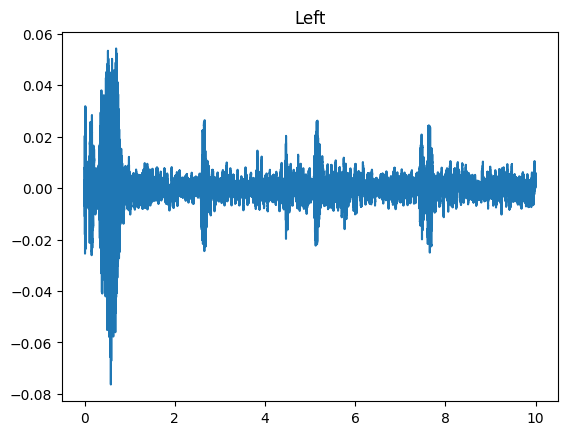

In [12]:
# Importer les bibliothèques nécessaires
# Gestion du son
import sounddevice as sd
import soundfile as sf
# Bibliothèques pour analyse traitement du signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import scipy.signal
import numpy as np
#Bibliothèques pour générer, acquérir les sons
import traitsignfip
from importlib import reload
reload(traitsignfip)



data_left, data_right = traitsignfip.record(10)

fs = 44100 # fréquence d'échantillonage
N=len(data_left) #nombre d'échantillions 
n = np.arange(0,N)/fs   #on divise par la fréquence d'échantillonage pour etre mieux dans l'échelle 

distance=0.8#Distance entre les deux micros en mètre


plt.figure()
plt.title("Right")
plt.plot(n,data_right)
plt.figure()
plt.title("Left")
plt.plot(n,data_left)

[1, 2, 3, 4, 5]
5


[0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1
 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0]


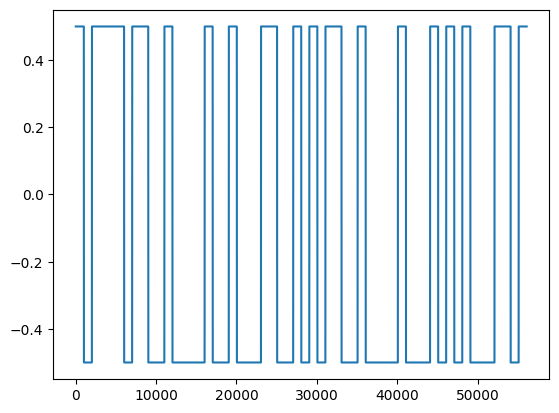

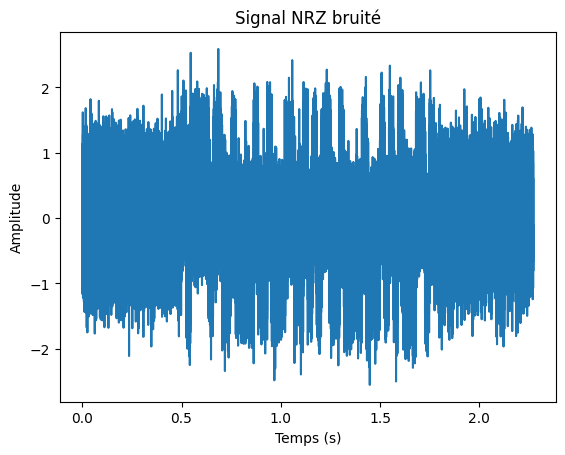

100212


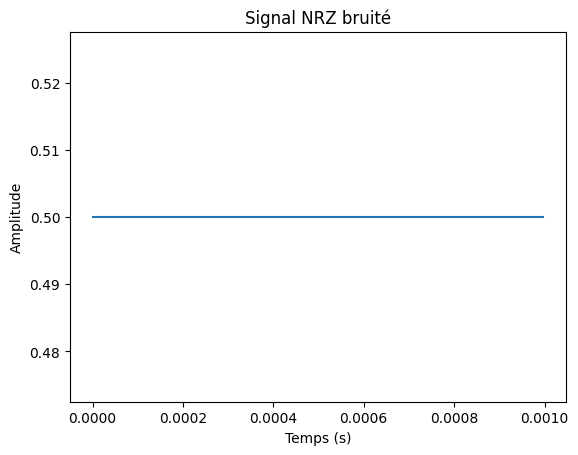

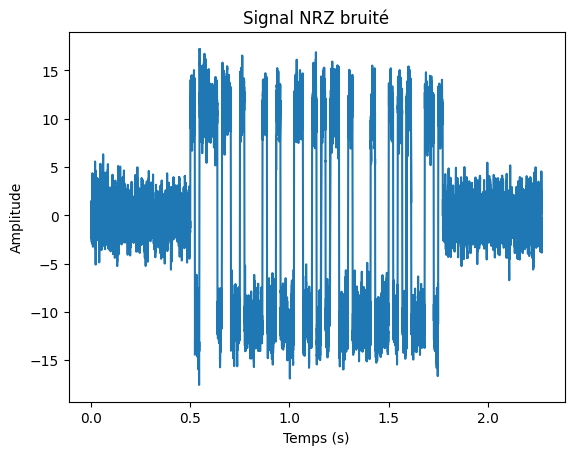

In [25]:
import comnumfip
import sounddevice as sd
from importlib import reload
reload(comnumfip)

import numpy as np

def add_noise(signal, noise_level):
    """Ajoute du bruit blanc gaussien à un signal
    
    Args:
        signal (np.ndarray): signal d'entrée
        noise_level (float): niveau de bruit à ajouter
        
    Returns:
        np.ndarray: signal avec bruit ajouté
    """
    noise = np.random.normal(scale=noise_level, size=len(signal))
    noisy_signal = signal + noise
    return noisy_signal


message="Bonjour"
signal = comnumfip.NRZ_signal_generator(message)
bruited_signal = add_noise(signal, 0.5)

    
comnumfip.send_signal_to_canal(bruited_signal)

comnumfip.plot_signal(bruited_signal)

print(len(bruited_signal))

T=44/44100
fe = 44100#Fréquence d'échantillonnage
Te = 1/fe
t = np.arange(0,T,1/fe)# BAse de temps 
h =np.where((t>=0)&(t<=1),0.5,0)#Signal 

comnumfip.plot_signal(h)

matched_filter = np.correlate(bruited_signal, h, mode='full')

comnumfip.plot_signal(matched_filter)

